# Assignment 2:


## 1a)

In [182]:
#importing modules
import numpy as np
import matplotlib.pyplot as plt


#defining a function to create our chebyshev fit taking the x range as well as the function
#takes the function (log2(x)) as well as the order of the polynomial I wish to fit, and the
#tolerance
def cheby_mat(x, y, order, tol=1e-6):
    
    #rescaling the Chebyshev polynomials from -1 to 1 as they're well behaved on this region
    x_new = x-x.min()
    x_new = x_new/x_new.max()
    x_new = 2*x_new-1
    
    #generating a matrix to take the chebyshev polynomials based on the order given
    mat=np.zeros([len(x),order+1])
    mat[:,0]=1.0
    if order > 0:
        mat[:,1]=x_new
    if order > 1:
        for i in range(1,order):
            mat[:,i+1]=2*x_new*mat[:,i]-mat[:,i-1]
    
    #in order to minimized chi-sqaured
    #Solve dot(mat.tranpose(), mat)*m = np.dot(mat.transpose(), y) for m
    #m will give us the best fit for the cehbyshev polynomial
    lhs=np.dot(mat.transpose(),mat)
    rhs=np.dot(mat.transpose(),y)
    
    #fitp is the m, best fit of the polynomials
    fitp=np.dot(np.linalg.inv(lhs),rhs)
    
    #finding the coefficients greater than the tolerance
    #Then find the number of terms needed to provide an accuracy below the tolerance
    n_trunc = np.sum(np.abs(fitp) >= tol)
    
    #truncating our matrixes to n_trunc terms for the chebyshev fit
    mat_trunc = mat[:,:n_trunc]
    fit_trunc = fitp[:n_trunc]
    #fitting the data as dot(mat,fit) AKA dot(A,m)
    pred_trunc = np.dot(mat_trunc, fit_trunc)
    
    return pred_trunc, n_trunc




the number of terms is 8


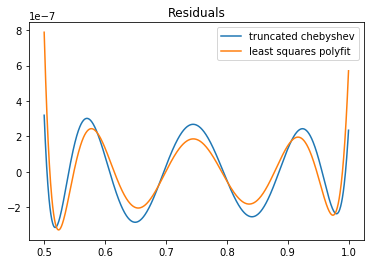

The max residual from the Chebyshev fit is 3.1969792346764336e-07 and the max residual using the polyfit is 7.888699644631458e-07
The rms residual from the Chebyshev fit is 1.919634866185176e-07 and the rms residual using the polyfit is 1.685251824787752e-07


<Figure size 432x288 with 0 Axes>

In [183]:
#modelling our function log2(x) on the region 0.5 to 1

x=np.linspace(0.5,1,1000)
#x = np.random.random(size=1000)
#x[x < 0.5] = x[x < 0.5] + 0.5
y=np.log2(x)
#inds = np.argsort(x)
#x = x[inds]
#y = y[inds]

#using 15th order as this will be truncated to a smaller order anyway
#, passing values to the chebyshev fitting function
trun_fit, num_ter = cheby_mat(x,y,15)
trun_fit=trun_fit
#printing the number of terms
print('the number of terms is', num_ter)

#taking residual as the fit - the actual value
resid = trun_fit-y
max_error=np.max(resid)
rms_err=np.sqrt(np.mean(resid**2))

#fitting the polyfit polynomial to the same order as the truncated chebyshev polynomial
pp=np.polyfit(x,y,num_ter-1)

pv=np.polyval(pp,x)

#taking the residual and error on the poly fit
resid_pol=pv-y
max_err_pol=np.max(resid_pol)
rms_err_pol=np.sqrt(np.mean(resid_pol**2))

#plotting the residuals of the truncated fit and the polyfit
plt.plot(x, resid, label='truncated chebyshev')
plt.plot(x,resid_pol,label='least squares polyfit')
plt.title('Residuals')
plt.legend()
plt.show()
plt.clf()

print('The max residual from the Chebyshev fit is', max_error,
      'and the max residual using the polyfit is', max_err_pol)
print('The rms residual from the Chebyshev fit is', rms_err,
      'and the rms residual using the polyfit is', rms_err_pol)


The truncated Chebyshev fit needs 8 terms to fit with the desired accuracy (better than $10^{-6}$) and it is thus a 7th order Chebyshev. The plotted residuals show us that the truncated Chebyshev fit is better at the ends of the data, while the regular least squares polynomial fit is better in the central region. The Chebyshev fit has a lower max residual but has a slightly higher RMS residual when compared with the least squares fit


## b)

Modelling the Chebyshev for any positive number. We can break down our values into the Mantissa (m) and the exponent(character) ex. Taking the log2(x) is the same as ex+log2(m). So we do our Chebyshev fit on the log2(m) then we add ex

the number of terms is 8


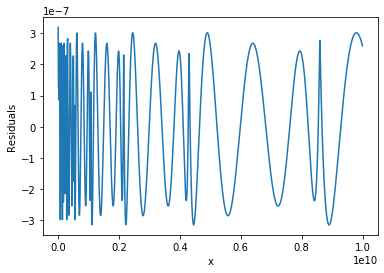

the rms residual is 1.9728198363896605e-07
the max residusal is 3.1911877063084404e-07


In [188]:
#function to extend the fit to any positiive number by putting the mantissa in for the x values
# takes x values as an array, the y values as array, and an integer order
def cheby_mat_any(x, y, order, tol=1e-6):
    #decomposing the x values in to their mantissa and character
    mant,ex=np.frexp(x)
    #pass the mantissa to the previously defined function for the chebyshev fit
    pred_trunc, n_trunc=cheby_mat(mant,np.log2(mant),order)
    #add the character(exponent) on to pred_trunc in order to get the Chebyshev fit
    pred_trunc=pred_trunc+ex
    return pred_trunc, n_trunc

x = np.linspace(0.5,1e10,1000)
y=np.log2(x)

trun_fit, num_ter = cheby_mat_any(x,y,15)

print('the number of terms is', num_ter)
resid = trun_fit-y
max_error_any=np.max(resid)
rms_err_any=np.sqrt(np.mean(resid**2))


plt.plot(x, trun_fit-np.log2(x))
plt.xlabel('x')
plt.ylabel('Residuals')
plt.show()
print('the rms residual is',rms_err_any)
print('the max residusal is',max_error_any)

The Chebyshev fit here is able to fit to the log2(x) for any positive number x

## Question 2: a)

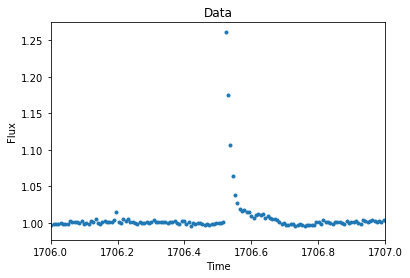

In [266]:
#importing the data from the text file and assigning the columns
dat=np.loadtxt('229614158_PDCSAP_SC6.txt',delimiter=',')
time = dat[:,0]
flux = dat[:,1]

#plottng the data and zooming on the important region
plt.plot(time,flux,'.')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Data')
plt.xlim(1706,1707)
plt.show()


The exponential decay function can be modelled as
$a e^{(-b(t-tc))}+c$

where tc is the the critical time at which the flair begins.

As a result the total funciton can be modelled as a piecewise function where
$$
f(t) = \begin{cases} 
        c & t \lt t_C \\ 
        ae^{-b(t-tc)}+c & t \geq t_C 
        \end{cases}
$$
For the initial guess of the parameters I  use:

$
\begin{align}
a= 0.25 \\
b= 32 \\
c= 1 \\
tc= 1706.52
\end{align}
$

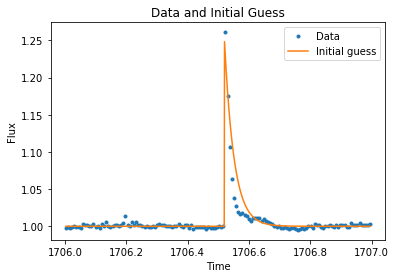

In [267]:

#zooming on the region between time 1706 and 1707 and taking data for the time and flux
#in that region
zoom_reg=(time>=1706) & (time <= 1707)
time_zoom=time[zoom_reg]
flux_zoom=flux[zoom_reg]
# creating an initial guess for the parameters of the exponential decay by looking at the graph
a = 0.25
b = 32
c = 1
tc = 1706.52

x = np.linspace(time_zoom[0], time_zoom[-1], 1000)

#taking the values of our function with the exponential decay starting at the critical time tc
func = [c if i < tc else a*np.exp(-b*(i-tc))+c for i in x]

#plotting the initial guess as well as the data
plt.plot(time_zoom, flux_zoom, '.', label='Data')
plt.plot(x, func, label='Initial guess')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Data and Initial Guess')
plt.legend()
plt.show()

## b) 
I want to minimize chi-squared so here I am using newtons method to get a non-linear fit with the derivative of each of the variable (a,b,c) in my model. Using this I will extract the parameters of my best fit equation

In [268]:

# creating a model to take the initial guess parameters, an array of time values(t0)
#over which it works and the critical time tc I set as fixed 1706.52
def mod_deriv(pars, t, tc):
    a = pars[0]
    b = pars[1]
    c = pars[2]
    
    #our function taking the exponential decay with out given parameters starting at tc and
    #just taking the constant c parameter before tc
    fun=np.asarray([c if i<tc else a*np.exp(-b*(i-tc))+c for i in t])
    
    #calculating ther derivatives for each of our paramters
    dA = (fun-c)/a
    dB = (tc-t)*(fun-c)
    dC = 1.0
    
    #generating a matrix taking our derivatives with respect to each of our parameters
    derivs = np.zeros([len(t), len(pars)])
    derivs[:,0] = dA
    derivs[:,1] = dB
    derivs[:,2] = dC
    
    return fun, derivs

#iterating 5 times to find an acceptable minimum of chi-squared
n = 5

pars = [a,b,c]


#this will take our fitted flux values for each iteration of the non-linear fitting
tot_fun = np.zeros([len(time_zoom), n+1])

fun, derivs = mod_deriv(pars, time_zoom, tc)

resid

#first taking the fitted values from our initial guess
all_fun[:,0]=fun


for i in range(1,n+1):
    #calculating the gradient and curve as well as the covariance 
    grad = 2*np.dot(derivs.transpose(), resid)
    curve = 2*np.dot(derivs.transpose(), derivs)
    covar = np.linalg.inv(curve)
    
    pars = pars + np.dot(covar, grad)
    
    #taking the function for our new parameters and putting the back into the function
    fun, derivs= mod_deriv(pars,time_zoom,tc)
    
    resid  = flux_zoom-fun
    
    all_fun[:,i]=fun


print('Best-fit parameters for are: a = ',pars[0], ',b=',pars[1], ',c=', pars[2])


Best-fit parameters for are: a =  0.31955568636158177 ,b= 64.15009175944215 ,c= 1.0011294565371482


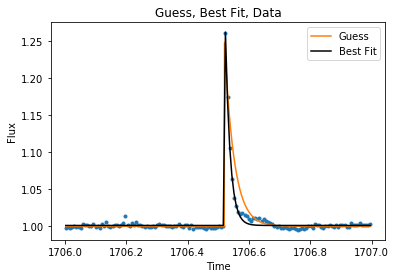

In [269]:
#plotting the best fit parameters along with the inital gues and the actual data
plt.plot(time_zoom, flux_zoom, '.')
plt.plot(x, f, label='Guess')
plt.plot(time_zoom, fun, 'k', label='Best Fit')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Guess, Best Fit, Data')
plt.legend()
plt.show()

## c) 
The error on the best fit parameters should be given by square root of the diagonal of the covariance matrix which is just the inverse of the curvature matrix. Here I am taking the diagonal of the covariance matrix calculated above and square rooting it then extracting the values for the error on each parameter

In [270]:

#print(error_on_fit[0])
print('Best fit parameters and their errors are:')
print('a = ',pars[0],' +/- ',np.sqrt(np.diag(covar)[0]))
print('b =',pars[1],' +/-',np.sqrt(np.diag(covar)[1]))
print('c = ',pars[2],'+/-',np.sqrt(np.diag(covar)[2]))

Best fit parameters and their errors are:
a =  0.31955568636158177  +/-  0.96487628478916
b = 64.15009175944215  +/- 279.34314394661413
c =  1.0011294565371482 +/- 0.06089263346829024


The errors for $a$ and $b$ are very large and unreasonable. With the given error on $a$ the values could extend to around -0.61, this means that the fit go down from the intial value $c$ before returning exponentially back in our function, this would describe the data very inaccurately. If $b$ were to be negative, then the model would also be completely inaccurate. In this situation the flux would increase exponentially with time after the flare at tc which is not what we want as we're looking for an exponential decay.

The error for $c$ seems reasonable locally, as the fit between the data and the model is quite close for the region that was plotted.


## d)

Plotting on the entire region for the full data the error on $c$ (below) we see that there seems to be a greater fluctuation in the baseline values before the flare. This region represents the $c$ value and our error on $c$ seems unreasonably small as there appears to be quite a lot of fluctuation from the value from our best fit. The errors on a and b are still unreasonable as described above as they do no play a part until the flare. I would not consider the errors on this linear fit to be reasonable in modelling the data as a whole.

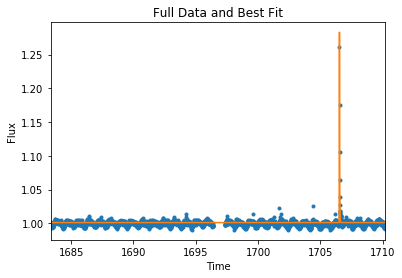

In [271]:
#plotting over the whole region with our fit parameters to see if they reasonably describe
#the data with their errors

x = np.linspace(time[0], time[-1], 1000)
fun, deriv = mod_deriv(pars, x, tc)
plt.plot(time, flux, '.')
plt.plot(x, fun)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Full Data and Best Fit')
plt.xlim(time[0],time[-1])
plt.show()

#see explanation above

## 2c) attempt #2
I attempted 2c) again by simulating gaussian noise and adding it to the the function and then adding it to the function and doing this 100 times using a for loop then approximating the errors using standard deviation of the parameter values extracted as our errors. This method produced even larger errors than before so it was not succesful

In [273]:
#Attempting to do 2c) a differenent way 


#computing the rms of our function to use as the stdev in simulating guassian noise
rms=np.sqrt(np.mean((resid)**2))

pars_simul=[]
pars_sim=[a,b,c]
for i in range(100):
    fun,derivs=mod_deriv(pars_sim,time_zoom,tc)
    #creating noise
    noise=np.random.normal(0,rms,len(flux_zoom))
    #adding noise to our function
    y_sim=fun+noise
    resid=y_sim-flux_zoom
    grad = 2*np.dot(derivs.transpose(), resid)
    curve = 2*np.dot(derivs.transpose(), derivs)
    covar = np.linalg.inv(curve)
    #computing the parameters using our function with noise
    pars_new = pars_sim + np.dot(covar, grad)  
    pars_simul.append(pars_new)
    
pars_simul=np.array(pars_simul)
#taking the error as standard deviation of parameters
errors=np.std(pars_simul,axis=0)
#print(error_on_fit[0])
print('Best fit parameters and their errors are:')
print('a = ',pars[0],' +/- ',errors[0])
print('b =',pars[1],' +/-',errors[1])
print('c = ',pars[2],'+/-',errors[2])

Best fit parameters and their errors are:
a =  0.31955568636158177  +/-  2.953929957027498
b = 64.15009175944215  +/- 552.6442758885258
c =  1.0011294565371482 +/- 0.30191975019809586
